In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

/Users/bengusunar/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/bengusunar/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
os.chdir('MovieLens-1m')
movies = pd.read_csv("movies1m.csv")
users = pd.read_csv("users1m.csv")
ratings = pd.read_csv("ratings1m.csv")
os.chdir('..')

In [3]:
print("There are " ,len(ratings["User ID"].unique()), " users")
print("There are " ,len(ratings["Movie ID"].unique()), " movies")

There are  6040  users
There are  3706  movies


Text(0.5, 1.0, 'Histogram of Ratings')

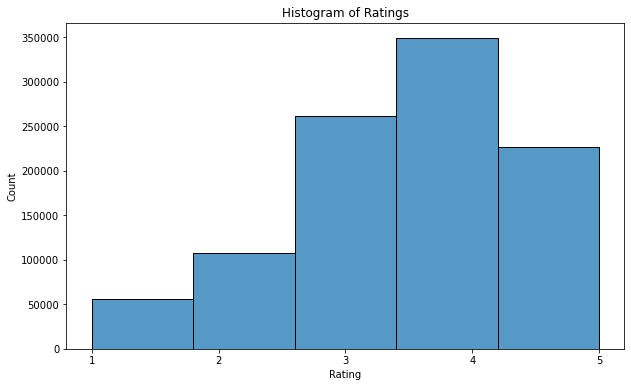

In [4]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=ratings, x="Rating", bins = 5)
plt.xticks(range(1, 6, 1))
plt.title("Histogram of Ratings")

In [5]:
print((ratings.groupby("User ID").size() > 50).sum(), "users have more than 50 reviews")
print((ratings.groupby("Movie ID").size() > 50).sum(), "movies have more than 50 reviews")

4247 users have more than 50 reviews
2499 movies have more than 50 reviews


In [6]:
#Filtering out movies and users with less than 50 reviews
user_series = ratings.groupby("User ID").size() > 50
user_index = list((user_series[user_series].index))
movie_series = ratings.groupby("Movie ID").size() > 50
movie_index = list(movie_series[movie_series].index)
filtered_ratings = ratings[(ratings["User ID"].isin(user_index)) & (ratings["Movie ID"].isin(movie_index))]

In [7]:
filtered_ratings.head()

,User ID,Movie ID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
len(filtered_ratings)

918946

Text(0.5, 1.0, 'Histogram of Filtered Ratings')

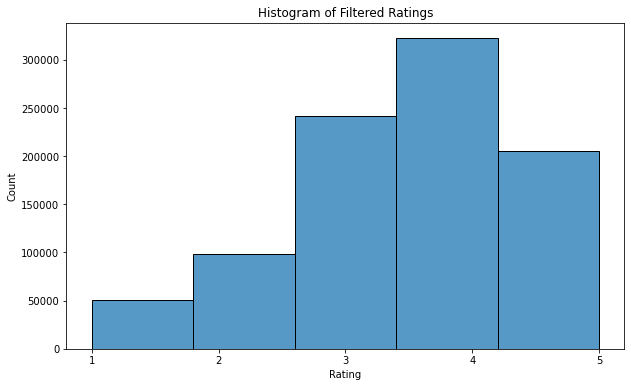

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=filtered_ratings, x="Rating", bins = 5)
plt.xticks(range(1, 6, 1))
plt.title("Histogram of Filtered Ratings")

In [10]:
movies.head()

,Movie ID,Title,Genres,Tite
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story (1995)
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji (1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II (1995)


In [11]:
genres = movies['Genres'].str.get_dummies(sep='|')
movies_encoded = pd.concat([movies, genres], axis=1)
movies_encoded = movies_encoded.drop(columns = ["Genres", "Title", "Tite"])

Text(0.5, 1.0, 'Bar Plot of Movie Genres')

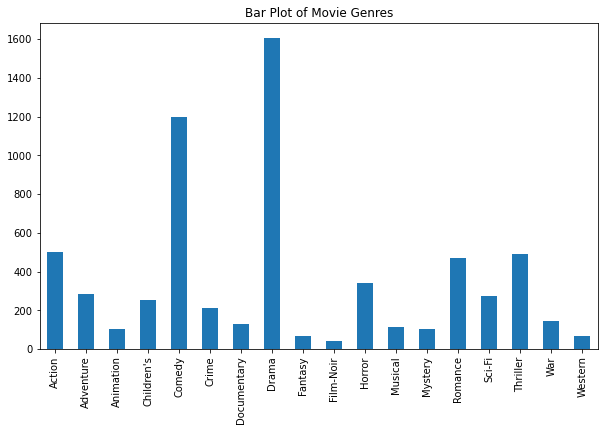

In [12]:
plt.figure(figsize=(10, 6))
movies_encoded.sum()[1:].plot.bar()
plt.title("Bar Plot of Movie Genres")

In [13]:
movies_encoded.sum()[1:]

Action          503
Adventure       283
Animation       105
Children's      251
Comedy         1200
Crime           211
Documentary     127
Drama          1603
Fantasy          68
Film-Noir        44
Horror          343
Musical         114
Mystery         106
Romance         471
Sci-Fi          276
Thriller        492
War             143
Western          68
dtype: int64

In [14]:
movies_encoded.columns

Index(['Movie ID', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [15]:
users.head()

,User ID,Gender,Age,Occupation,Zip Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


Text(0.5, 1.0, "Histogram of User's Ages")

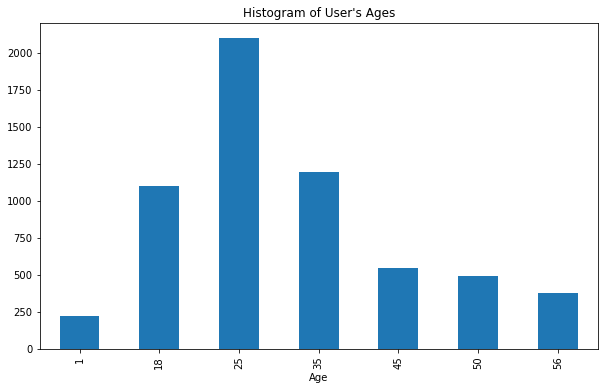

In [16]:
plt.figure(figsize=(10, 6))
users.groupby("Age").size().plot.bar()
plt.title("Histogram of User's Ages")

In [17]:
users["Age"].value_counts()

Age
25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: count, dtype: int64

In [18]:
users["Occupation"].value_counts()

Occupation
4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: count, dtype: int64

In [19]:
ratings.head()

,User ID,Movie ID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [20]:
len(movies)

3883

In [24]:
len(users)

6040

In [21]:
#Binarization
mean_ratings = filtered_ratings.groupby("User ID")["Rating"].mean()
filtered_ratings = filtered_ratings.merge(mean_ratings, left_on='User ID', right_index=True, suffixes=('', '_mean'))
filtered_ratings['Scaled Rating'] = filtered_ratings['Rating'] - filtered_ratings['Rating_mean']

In [22]:
# 1 if liked -1 if not liked
filtered_ratings["Binary Rating"] = 1 - 2*(1-(filtered_ratings["Scaled Rating"] > 0))

In [23]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [24]:
train_df, test_df = train_test_split(filtered_ratings, test_size=0.1, random_state=42)

In [25]:
bin_wide_df = train_df.pivot(index='User ID', columns='Movie ID', values='Binary Rating')
wide_df = train_df.pivot(index='User ID', columns='Movie ID', values='Rating')

In [26]:
bin_wide_df_test = test_df.pivot(index='User ID', columns='Movie ID', values='Binary Rating')
wide_df_test = test_df.pivot(index='User ID', columns='Movie ID', values='Rating')

In [27]:
wide_df

Movie ID,1,2,3,4,5,6,7,8,9,10,...,3932,3936,3937,3943,3946,3947,3948,3949,3950,3952
User ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,4.0,NaN,1.0,2.0,1.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
bin_wide_df

Movie ID,1,2,3,4,5,6,7,8,9,10,...,3932,3936,3937,3943,3946,3947,3948,3949,3950,3952
User ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,1.0,NaN,-1.0,-1.0,-1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6036,NaN,NaN,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
wide_df.isna().sum().sum()/(wide_df.shape[0]*wide_df.shape[1])

0.9220737506210396

In [31]:
os.chdir('1M-Clean-Data')
wide_df.to_csv("1M_wide_df.csv")
bin_wide_df.to_csv("1M_binary_wide_df.csv")
test_df.to_csv("test_df.csv")
os.chdir('..')